In [1]:
# For COLAB use only

from google.colab import drive
drive.mount('/content/drive')

import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/S6 Mini Project/training.zip', 'r') # Opens the zip file in read mode
zip_ref.extractall('/content') # Extracts the files into the /tmp folder
zip_ref.close()

Mounted at /content/drive


In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [8]:
# define the image size and batch size
img_size = (40, 40)
batch_size = 32

# Path to your dataset folder 
data_dir = "/content/newest dataset mixed"

In [12]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory( # training set
    data_dir,
    labels= "inferred",
    color_mode='grayscale',
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=img_size,
    batch_size=batch_size)

test_ds = tf.keras.preprocessing.image_dataset_from_directory( # testing set
    data_dir,
    labels= "inferred",
    color_mode='grayscale',
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=img_size,
    batch_size=batch_size)

Found 22574 files belonging to 8 classes.
Using 18060 files for training.
Found 22574 files belonging to 8 classes.
Using 4514 files for validation.


In [13]:
# inspect the class names and number of classes
class_names = train_ds.class_names
num_classes = len(class_names)
print('Class names:', class_names)
print('Number of classes:', num_classes)

Class names: ['0', '1', '2', '3', '4', '5', '6', '7']
Number of classes: 8


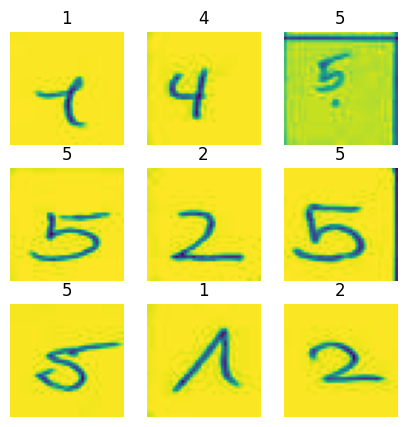

In [14]:
plt.figure(figsize=(5, 5))
for images, labels in train_ds.take(2):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# create the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(40, 40, 1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 4, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# The neural network architecture consists of sequential layers, where the output of one layer is passed as input to the next layer.

# The first layer is a convolutional layer with 16 filters of size 3x3, followed by a ReLU activation function. 
# The input shape of the layer is (40, 40, 1), which means that the layer expects input images of size 40x40 with one color channel (grayscale).

# The second layer is a max pooling layer that reduces the spatial dimensions of the output from the previous layer by taking the maximum value in each 2x2 window.

# The third layer is another convolutional layer with 32 filters of size 3x3, followed by a ReLU activation function.

# The fourth layer is another max pooling layer.

# The fifth layer is a flatten layer that flattens the output from the previous layer into a 1D vector.

# The sixth layer is a dense layer with 64 units and a ReLU activation function.

# The seventh and final layer is a dense layer with num_classes units and a softmax activation function, which produces the predicted class probabilities for the input image.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 38, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 19, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 128)               5

In [ ]:
# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# train the model
history= model.fit(train_ds, validation_data=test_ds, epochs=20)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


565/565 [==============================] - 16s 12ms/step - loss: 1.0100 - accuracy: 0.6499 - val_loss: 0.3495 - val_accuracy: 0.9014
Epoch 2/20
565/565 [==============================] - 5s 9ms/step - loss: 0.2268 - accuracy: 0.9377 - val_loss: 0.1818 - val_accuracy: 0.9464
Epoch 3/20
565/565 [==============================] - 6s 10ms/step - loss: 0.1151 - accuracy: 0.9684 - val_loss: 0.1529 - val_accuracy: 0.9546
Epoch 4/20
565/565 [==============================] - 5s 8ms/step - loss: 0.0712 - accuracy: 0.9801 - val_loss: 0.1149 - val_accuracy: 0.9721
Epoch 5/20
565/565 [==============================] - 6s 10ms/step - loss: 0.0476 - accuracy: 0.9863 - val_loss: 0.1187 - val_accuracy: 0.9694
Epoch 6/20
565/565 [==============================] - 4s 7ms/step - loss: 0.0302 - accuracy: 0.9915 - val_loss: 0.1375 - val_accuracy: 0.9659
Epoch 7/20
565/565 [==============================] - 5s 8ms/step - loss: 0.0228 - accuracy: 0.9942 - val_loss: 0.1179 - val_accuracy: 0.9734
Epoch 8/20
56

In [ ]:
_, train_acc = model.evaluate(train_ds, verbose=0)
_, test_acc = model.evaluate(test_ds, verbose=0)

print(f'Training Accuracy: {(train_acc * 100):.2f}%\nTesting Accuracy: {(test_acc * 100):.2f}%')

Training Accuracy: 100.00%
Testing Accuracy: 97.92%


In [ ]:
# model.save('MP_colab.h5')

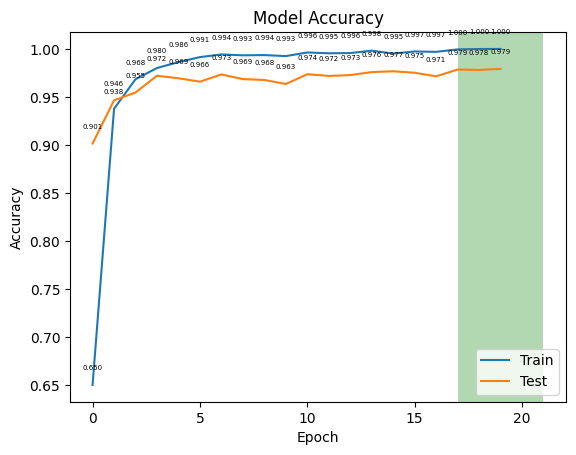

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

# Add annotations to display y-axis values at the top of each point
for i, acc in enumerate(history.history['accuracy']):
    plt.annotate('{:.3f}'.format(acc), (i, acc), xytext=(0, 10), textcoords='offset points', ha='center', va='bottom', fontsize=5)
for i, val_acc in enumerate(history.history['val_accuracy']):
    plt.annotate('{:.3f}'.format(val_acc), (i, val_acc), xytext=(0, 10), textcoords='offset points', ha='center', va='bottom', fontsize=5)

# Find epoch with highest validation accuracy
best_epoch = np.argmax(history.history['val_accuracy'])

# Highlight region around best epoch
plt.axvspan(best_epoch - 2, best_epoch + 2, facecolor='green', alpha=0.3)    

plt.show()

In [ ]:
# Convert one-hot encoded labels to class indices
true_labels_of_test_ds = np.concatenate([y.numpy() for _, y in test_ds])
y_pred = np.argmax(np.concatenate([model.predict(x) for x, _ in test_ds]), axis=1)

1/1 [==============================] - 0s 95ms/step


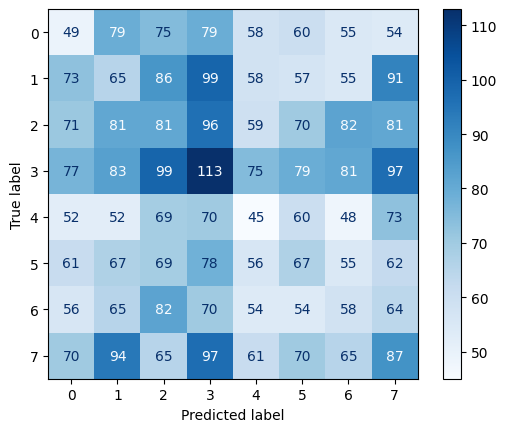

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(true_labels_of_test_ds, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(true_labels_of_test_ds, y_pred, average=None)#, labels=labels, average=average)
recall = recall_score(true_labels_of_test_ds, y_pred, average=None)#, labels=labels, average=average)

for i in range(8):
  print(f'Precision of {i}: {(precision[i] * 100):.2f}%  |  Recall of {i}: {(recall[i] * 100):.2f}%')

Precision of 0: 9.63%  |  Recall of 0: 9.63%
Precision of 1: 11.09%  |  Recall of 1: 11.13%
Precision of 2: 12.94%  |  Recall of 2: 13.04%
Precision of 3: 16.10%  |  Recall of 3: 16.05%
Precision of 4: 9.66%  |  Recall of 4: 9.59%
Precision of 5: 12.96%  |  Recall of 5: 13.01%
Precision of 6: 11.62%  |  Recall of 6: 11.53%
Precision of 7: 14.29%  |  Recall of 7: 14.29%


In [ ]:
# # For visualizing the model

# from keras.utils.vis_utils import plot_model
# plot_model(model, 
#            to_file='model.png',
#            show_shapes=True,
#            show_dtype=False,
#            show_layer_names=True,
#            rankdir='TB',
#            expand_nested=False,
#            dpi=300,
#            layer_range=None,
#            show_layer_activations=True
#           )